In [1]:
import pandas as pd
import numpy as np 


In [7]:
oil_price = pd.read_excel('oil_price.xlsx', sheet_name='aggregate')

In [8]:
oil_price

,Date,Price
0,2020,29.000000
1,2021,43.500000
2,2022,50.740880
3,2023,56.554417
4,2024,57.057800


## Current assumptions:
Oil prices are a combination of 4 different series:

1. EIA Short Term Energy Outlook (April 2020 release)
2. EIA International Energy Outlook 2019 (September 2019 release)
    - Low Oil Price 
    - Mid (Reference) Oil price
3. Deloitte Q1 2020 Oil & Gas Forecast

Prices are assumed as at year end. 2020 = December 2020. 

In current series, 2020, 2021 forecast is purely EIA, as they have monthly forecasts for oil.

2022 and beyond is an average of 3 series, the mid point from EIA's 2019 IEO, the low point from EIA's 2019 IEO, and Deloitte's forecast. 




In [4]:
import datetime

In [17]:
oil_price['Date']=pd.to_datetime(oil_price['Date'], format='%Y')+pd.offsets.YearEnd()

In [21]:
oil_price = oil_price.set_index('Date')


In [32]:
oil_price = oil_price.resample('Q',convention='start').asfreq()
cubic_interp = oil_price.interpolate(method='cubic')
quad_interp = oil_price.interpolate(method='quadratic')

Price
Date                 
2020-12-31  29.000000
2021-03-31  33.697934
2021-06-30  37.615213
2021-09-30  40.854314
2021-12-31  43.500000
2022-03-31  45.640990
2022-06-30  47.483366
2022-09-30  49.146523
2022-12-31  50.740880
2023-03-31  52.324659
2023-06-30  53.891418
2023-09-30  55.340811
2023-12-31  56.554417
2024-03-31  57.424036
2024-06-30  57.866727
2024-09-30  57.780732
2024-12-31  57.057800


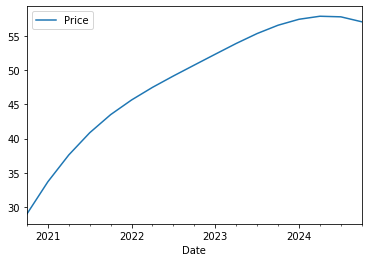

In [34]:
print(cubic_interp)

cubic_interp.plot()

Price
Date                 
2020-12-31  29.000000
2021-03-31  33.352777
2021-06-30  37.236539
2021-09-30  40.634136
2021-12-31  43.500000
2022-03-31  45.789042
2022-06-30  47.586139
2022-09-30  49.147214
2022-12-31  50.740880
2023-03-31  52.331509
2023-06-30  53.971596
2023-09-30  55.457835
2023-12-31  56.554417
2024-03-31  57.255697
2024-06-30  57.575688
2024-09-30  57.511601
2024-12-31  57.057800


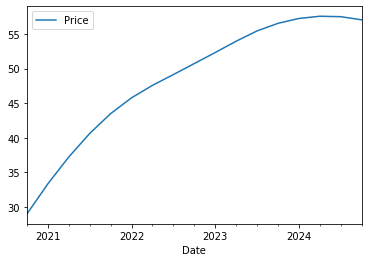

In [35]:
print(quad_interp)
quad_interp.plot()

In [37]:
oil_price['Cubic']= cubic_interp
oil_price['Quadratic']=quad_interp

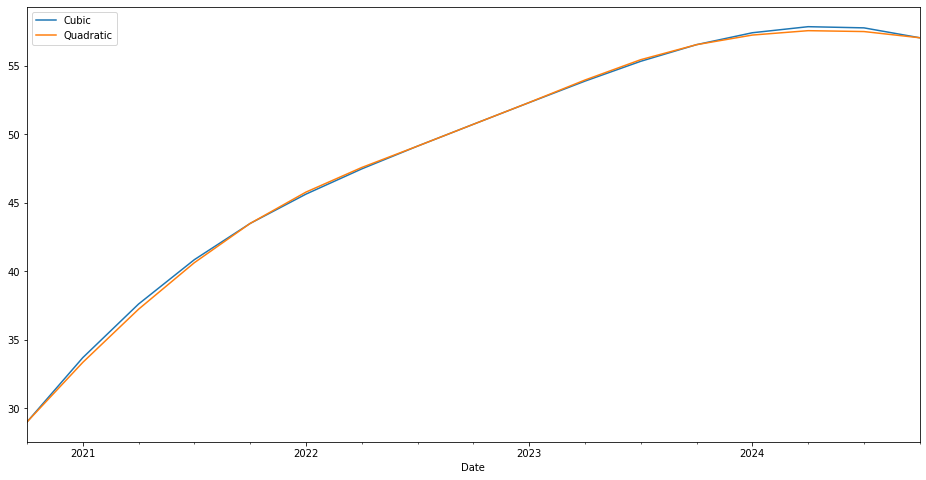

In [39]:
oil_price[['Cubic','Quadratic']].plot(figsize=(16,8))

In [40]:
oil_price

,Price,Cubic,Quadratic
Date,,,
2020-12-31,29.000000,29.000000,29.000000
2021-03-31,NaN,33.697934,33.352777
2021-06-30,NaN,37.615213,37.236539
2021-09-30,NaN,40.854314,40.634136
2021-12-31,43.500000,43.500000,43.500000
2022-03-31,NaN,45.640990,45.789042
2022-06-30,NaN,47.483366,47.586139
2022-09-30,NaN,49.146523,49.147214
2022-12-31,50.740880,50.740880,50.740880
